# Assignment 1

In the shared drive ```cds-vis-data```, you'll find a directory comprising 1360 different images of flowers. Many of these are different images of the same flower.

In groups, do the following activity:

- Pick a random flower from the dataset, load it, and normalize it
- Compare that image's colour histogram to every *other* flower in the dataset
- Print save the filename of the 5 closest images, along with the distance score you calculated
  - **Hint:** use ```pandas```
- Qualitatively inspect the images - how does your algorithm perform?
- Rewrite your code as a function which takes any input filename from a user and produces the new results showing top 5 closest images for the chosen image

In [1]:
# loading needed packages
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
import pandas as pd
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

## Pick a random flower from the dataset, load it, and normalize it

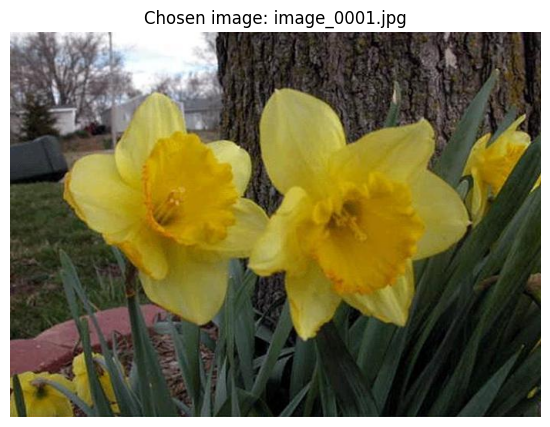

In [2]:
# loading my chosen image (the first one in the folder)
# as I am in the "nbs" folder, I am going two folders out to go into the "cds-vis-data" and "flowers" folder
image = cv2.imread(os.path.join("..", "..", "431824", "flowers", "image_0001.jpg")) # for some reason my "cds-vis-data" folder is called "431824" in UCloud
jimshow(image, "Chosen image: image_0001.jpg")

In [10]:
# normalizing the image using MinMax-normalization (WHY: )
#image_norm = cv2.normalize(image, None, 0, 1.0, cv2.NORM_MINMAX)

# NORMALIZE HISTOGRAMS INSTEAD!!!

# creating the color histogram for my chosen flower (using the normalized image, all three channels, no mask and the 0-255 range)
flower_hist = cv2.calcHist([image], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256])
flower_hist_norm = cv2.normalize(flower_hist, flower_hist, 0, 1.0, cv2.NORM_MINMAX)

## Compare that image's colour histogram to every *other* flower in the dataset

In [11]:
filepath = os.path.join("..", "..", "431824", "flowers") # define filepath to "flowers" folder

# creating two empty lists to append distance scores and filenames to
distances = []
filenames = []

for file in os.listdir(filepath): # for every file in the filepath
    if file == "image_0001.jpg": # if the file is my chosen image, continue to next file in the folder instead
        continue
    else: # if the file is not the same, do the following:
        new_path = filepath + f"/{file}" # defining path to the image
        new_im = cv2.imread(new_path) # reading the image
        new_flower_hist = cv2.calcHist([new_im], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256]) #create color histogram for that image
        new_flower_hist_norm = cv2.normalize(new_flower_hist, new_flower_hist, 0, 1.0, cv2.NORM_MINMAX) # normalize it as before
        distance_score = round(cv2.compareHist(flower_hist_norm, new_flower_hist_norm, cv2.HISTCMP_CHISQR), 2) # calculate distance score between the original image and new image

        # append the filenames and scores to the "distances" and "filenames" lists
        distances.append(distance_score)
        filenames.append(file)

## Print save the filename of the 5 closest images, along with the distance score you calculated

In [12]:
# creating a dataframe by converting the two lists to pandas-series with the column-labels "filename" and "distance_score", 

data = pd.DataFrame({"filename" : pd.Series(filenames),
                     "distance_score" : pd.Series(distances)})

In [13]:
sorted_data = data.sort_values('distance_score', ascending = True) # sorting the dataframe by the distance scores, in ascending order
closest_images = sorted_data[0:5] # extracting the first five rows, i.e., the five closest images by distance score

In [14]:
print(closest_images)

            filename  distance_score
295   image_0597.jpg            4.87
997   image_0594.jpg            5.03
64    image_0614.jpg            5.55
1236  image_0104.jpg            5.67
882   image_1126.jpg            5.68


## Qualitatively inspect the images - how does your algorithm perform?

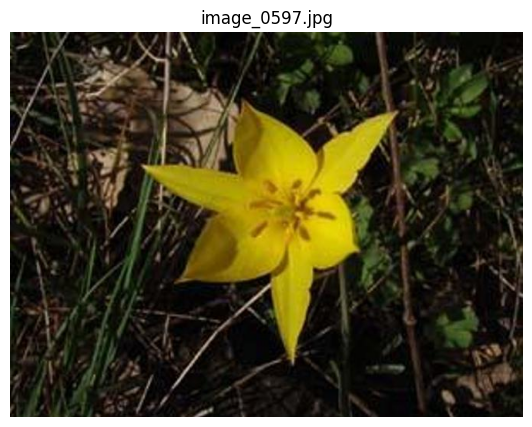

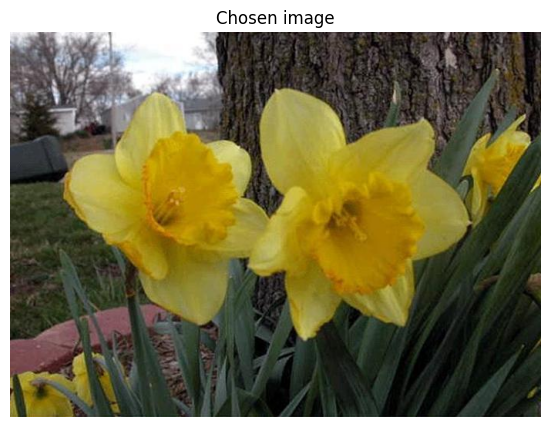

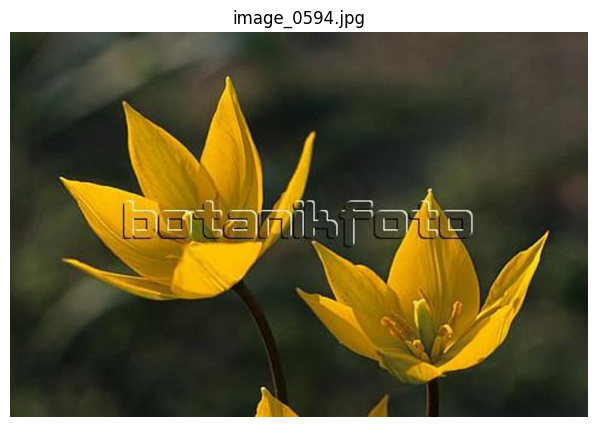

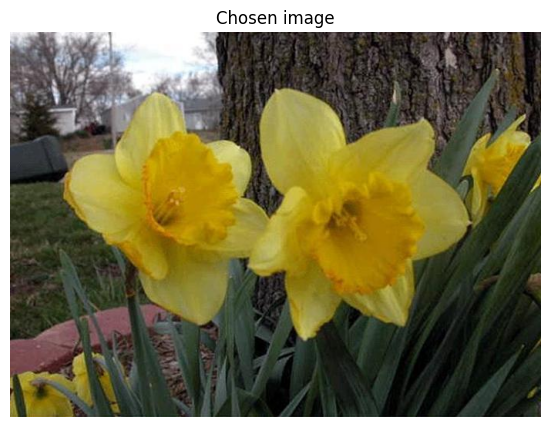

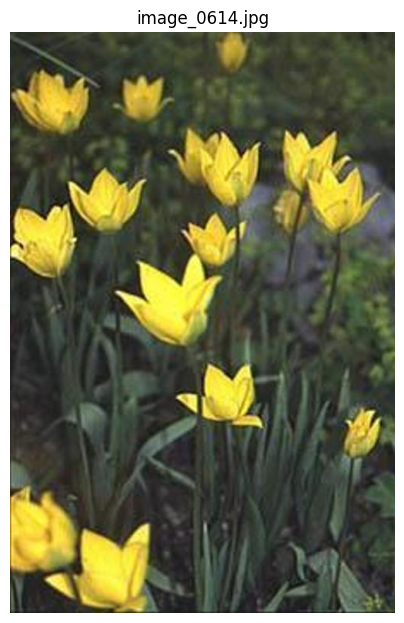

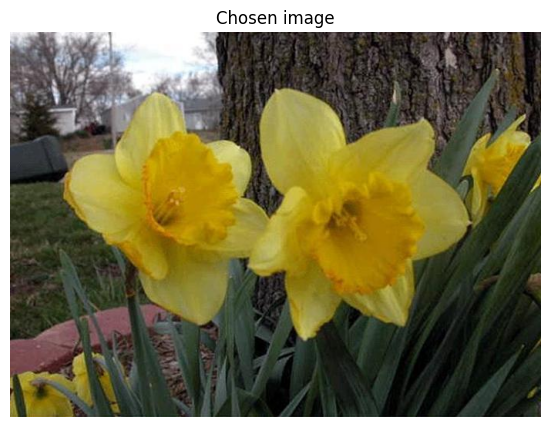

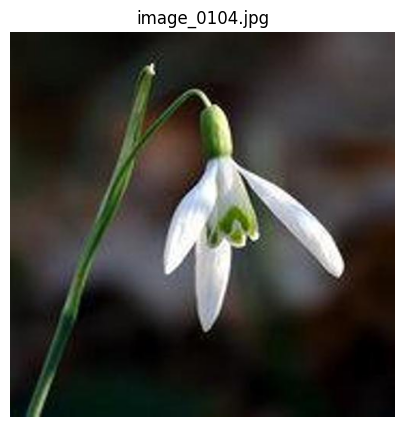

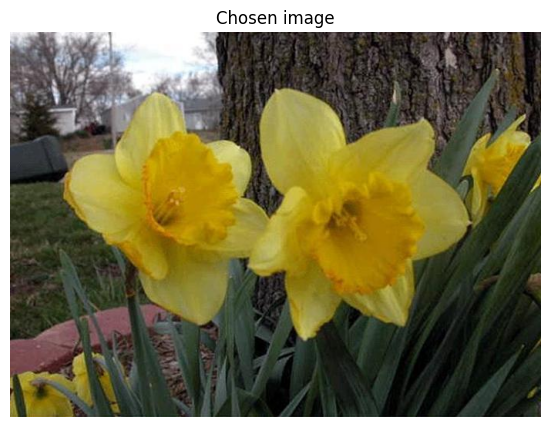

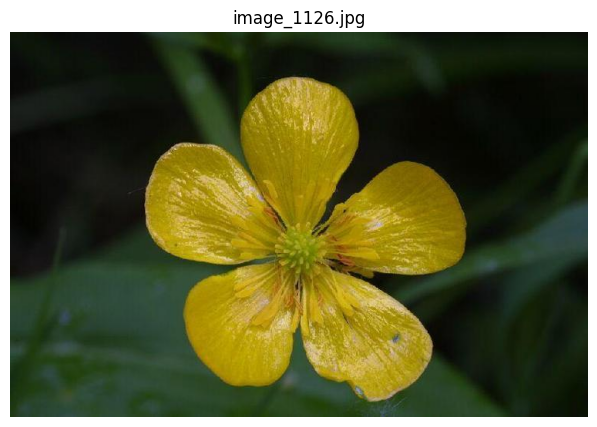

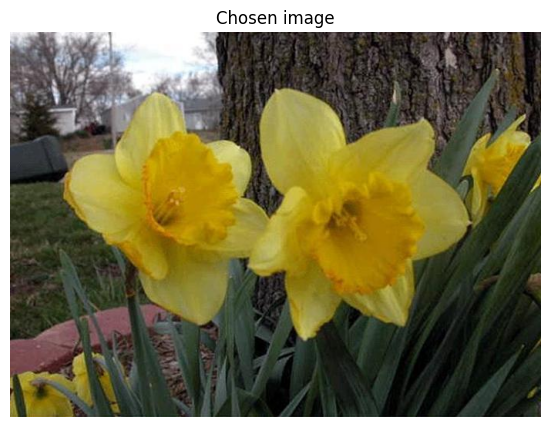

In [15]:
for file in closest_images['filename']:
    im_path = filepath + f"/{file}" # using the same filepath as defined before
    new_im = cv2.imread(im_path)
    jimshow(new_im, f"{file}")
    jimshow(image, "Chosen image")

The two closest image by distance score is *image_0597* and *image_0594*. The flowers are also yellow, and the rest of the images contain a mixture of browns and greens, just like the chosen image. The colors of the flowers appear to match well. It is, however, not the same flower as the original image, which indicates that the algorithm does not work perfectly in this case. The third closest image also contains a lot of yellow and green, but not that much brown, which could explain the third place. 

Surprisingly, the fourth closest image is a white flower. This is surprising as the yellow color is the first thing that you notice when you visually inspect the chosen image. Again, this is not a very good match by the algorithm, as it is neither the right flower or the right color. The fifth closest image is again of a yellow flower on a green background. 

Overall, by qualitatively inspecting the output, the algorithm performs adequately for the first three images when only looking at the color scales, which makes sense, since it is comparing color histograms. However, it fails for the image of the white flower. To conclude, comparing color histograms can be useful for detecting images with similar color histograms, but not as useful for detecting similar objects, in this case flowers. 

# delete this!

The five closest images are all of yellow flowers, which of course makes sense, as my chosen image is also of a yellow flower.


The closest image by distance score is *image_0049*. First of all, it is the exact same flower as the chosen image, which indicates that using color histograms is a pretty good and simple way to search for similar images, and that the algorithm performed fairly well. By qualitatively inspecting the colors on the image, it makes good sense that this would have the most similar color histogram. The chosen image contains a lot of yellow (from the flower pedals), where the outer pedals have a bit colder yellow tone, and the inner pedals have a warmer tone. Moreover, the chosen image also contains a lot of green from the stem of the flowers, as well as brown from the tree in the background. The closest image contains these things as well: the same varying tones of yellow and green from grass and the flower stems. The next three images are, however, not the same flowers, but other kinds of yellow flowers. They appear to be less similar in the yellow tone, where *image_0959* (2nd closest) and *image 0945* (4th closest) seem more bright in their yellow color, and *image_0567* (3rd closest) has a more vague yellow. Furthermore, they also seem to lack the prevalence of green that the closest picture *image_0049* and the chosen image has, as there are more browns and grays in the background. Interestingly, the 5th closest image *image_0048* seems to be of the same flower as the chosen image; perhaps the ranking of this has something to do with the lack of green in the image, as the background is mostly brown. The yellow colors also appear brighter than in the chosen image.

To sum up, *image_0049* is closest by distance score, but also by qualitative inspection, as it is the same kind of flower, has the same things in the background (grass/stems and trees) and same tones of yellow. This is also reflected from the distance scores; the second closest image has almost twice the distance score compared to the closest, indicating that it is by far the most similar image out of the five. 

## Rewrite your code as a function which takes any input filename from a user and produces the new results showing top 5 closest images for the chosen image

In [15]:
def flower_fun(filename:str, filepath:str) -> pd.core.frame.DataFrame:
    '''
    This function calculates a color histogram from an input image and compares it to every other image in the filepath by distance scores. Returns a pandas dataframe containing the 5 closest images by distance scores

    Arguments:
    filename: the filename of the chosen input image
    filepath: the filepath to the directory where the chosen input image and the images to be compared are located
    
    '''
    filepath_to_im = os.path.join(filepath, filename)
    chosen_im = cv2.imread(filepath_to_im)
    chosen_im_norm = cv2.normalize(chosen_im, None, 0, 1.0, cv2.NORM_MINMAX)
    hist1 = cv2.calcHist([chosen_im_norm], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])

    distances = []
    filenames = []

    for other_file in os.listdir(filepath):
        if other_file == filename:
            continue
        else:
            new_path = os.path.join(filepath, other_file)
            new_im = cv2.imread(new_path)
            new_im_norm = cv2.normalize(new_im, None, 0, 1.0, cv2.NORM_MINMAX)
            hist2 = cv2.calcHist([new_im_norm], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
            distance_score = round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)

            distances.append(distance_score)
            filenames.append(other_file)


    data = pd.DataFrame({"filename" : pd.Series(filenames),
                        "distance_score" : pd.Series(distances)})

    sorted_data = data.sort_values('distance_score', ascending = True) # sorting the dataframe by the distance scores, in ascending order
    closest_images = sorted_data[0:5]

    return(closest_images)

In [17]:
path = os.path.join("..", "..", "431824", "flowers")
testy = flower_fun("image_0001.jpg", path)
print(testy)

            filename  distance_score
838   image_0049.jpg         5466.86
299   image_0959.jpg        10826.41
47    image_0567.jpg        10915.38
110   image_0945.jpg        14913.18
1334  image_0048.jpg        16100.30


In [34]:
# remember to define the function in the proper way : ) 

# make second argument filepath!!! 

def flower_fun(filename:str) -> pd.core.frame.DataFrame:
    '''
    this is a good function:)
    '''
    filepath = os.path.join("..", "..", "431824", "flowers", f"{filename}")
    chosen_im = cv2.imread(filepath)
    chosen_im_norm = cv2.normalize(chosen_im, None, 0, 1.0, cv2.NORM_MINMAX)
    hist1 = cv2.calcHist([chosen_im_norm], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])

    distances = []
    filenames = []

    for other_file in os.listdir(os.path.join("..", "..", "431824", "flowers")):
        if other_file == filename:
            continue
        else:
            new_path = os.path.join("..", "..", "431824", "flowers", f"{other_file}")
            new_im = cv2.imread(new_path)
            new_im_norm = cv2.normalize(new_im, None, 0, 1.0, cv2.NORM_MINMAX)
            hist2 = cv2.calcHist([new_im_norm], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
            distance_score = round(cv2.compareHist(hist1, hist2, cv2.HISTCMP_CHISQR), 2)

            distances.append(distance_score)
            filenames.append(other_file)


    data = pd.DataFrame({"filename" : pd.Series(filenames),
                        "distance_score" : pd.Series(distances)})

    sorted_data = data.sort_values('distance_score', ascending = True) # sorting the dataframe by the distance scores, in ascending order
    closest_images = sorted_data[0:5]

    return(closest_images)

In [28]:
tryout = flower_fun("image_0001.jpg") # CHECK THAT IT RETURNS THE SAME AS BEFORE!
print(tryout)

            filename  distance_score
838   image_0049.jpg         5466.86
299   image_0959.jpg        10826.41
47    image_0567.jpg        10915.38
110   image_0945.jpg        14913.18
1334  image_0048.jpg        16100.30


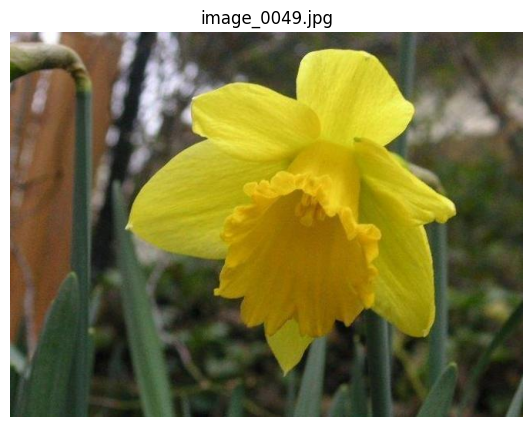

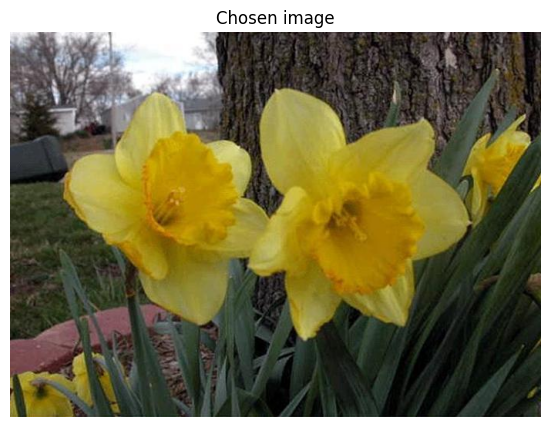

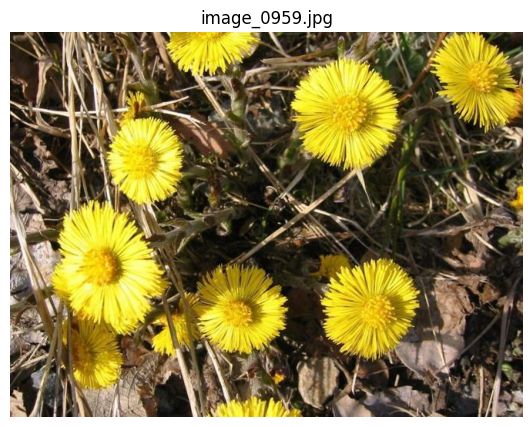

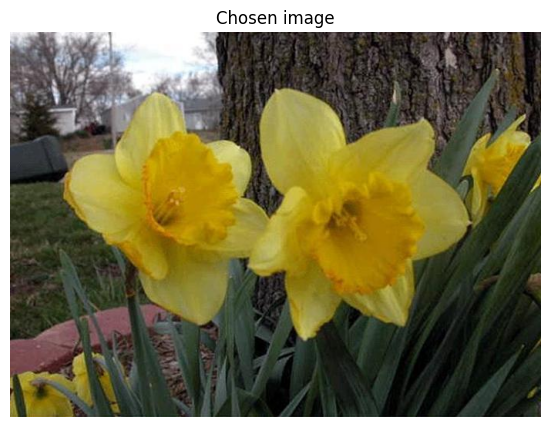

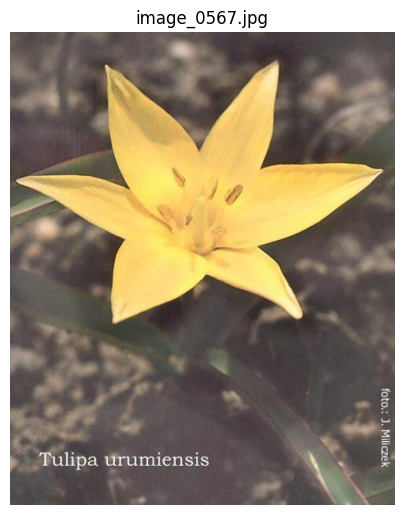

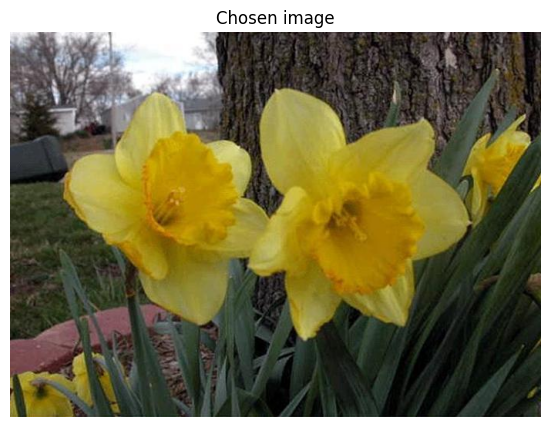

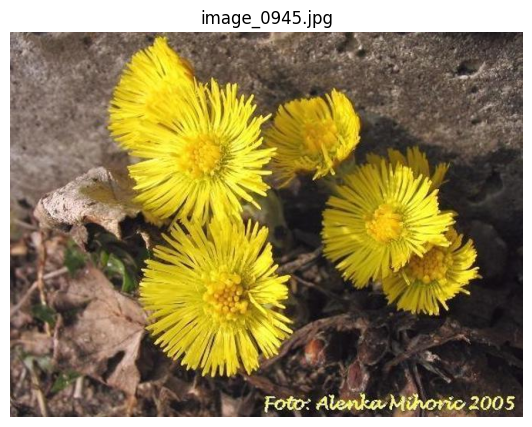

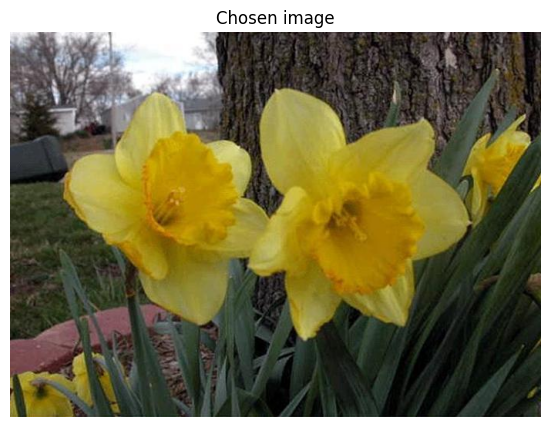

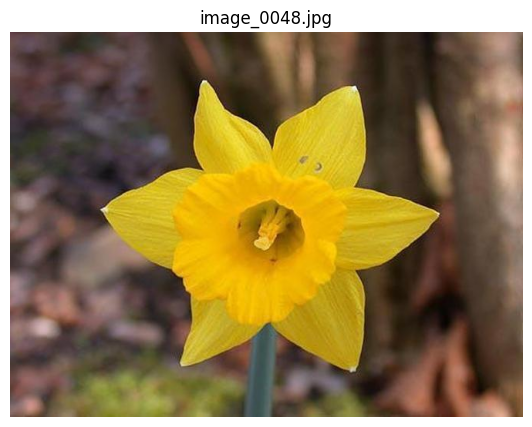

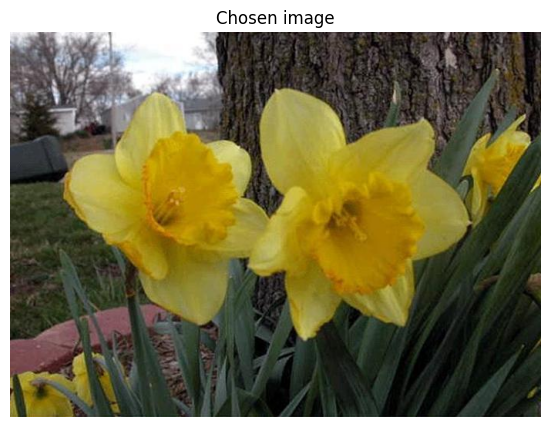

In [30]:
tryout_image = cv2.imread(os.path.join("..", "..", "431824", "flowers", "image_0001.jpg"))

for file in tryout['filename']:
    im_path = filepath + f"/{file}" # using the same filepath as defined before
    new_im = cv2.imread(im_path)
    jimshow(new_im, f"{file}")
    jimshow(tryout_image, "Chosen image")

In [32]:
type(tryout)

pandas.core.frame.DataFrame